# Super spreader análise

## Compilando os dados das cidades com potencia de super spreader

In [1]:
import pandas as pd

In [2]:
df_municipios = pd.read_csv("../data/integrado/municipio.csv")
df_municipios= df_municipios[df_municipios['latitude'].notna()]

In [41]:
#Carregar arquivos em dataframe
from os import listdir
from os.path import isfile, join
path = "../data/calculado/calculo_spreader/dois"
nome_files = [f for f in listdir(path) if isfile(join(path, f))]



In [42]:
dic_df = {}
for nome_file in nome_files:
    cod_cidade = int(nome_file[-11:-4])
    dic_df[cod_cidade] = pd.read_csv(path+"/"+nome_file)

In [43]:
#Somar três valores: total de caso na cidade, total de casos no restante do pais e total de caso
lista_analise = []

for cod_cidade in dic_df.keys():
    # cod_cidade = 2611606
    df_cidade = dic_df[cod_cidade]
    filtro_cidade = df_cidade["cod_mun"]==cod_cidade
    num_cidade = df_cidade[filtro_cidade]["dia_29"].sum()
    num_espalhamento = df_cidade[~filtro_cidade]["dia_29"].sum()
    num_total = num_cidade + num_espalhamento
    lista_analise.append((cod_cidade, num_cidade, num_espalhamento, num_total))


In [44]:
df_analise = pd.DataFrame(lista_analise, columns=["cod_mun","cidade", "espalhamento", "total"])

In [42]:
df_analise = pd.read_csv("../data/calculado/spreaders.csv")


In [43]:
df_analise = df_analise.merge(df_municipios[['cod_mun','nome_mun']], how='left', left_on='cod_mun', right_on='cod_mun')

In [45]:
df_analise.sort_values(by='espalhamento', ascending=False).head(50)

,cod_mun,cidade,espalhamento,total,nome_mun
1448,2605459,81.663193,46441.912936,46523.576129,Fernando de Noronha
4310,4314175,644.777546,44560.997212,45205.774758,Pedras Altas
2398,3127388,1663.053957,42331.984300,43995.038257,Goianá
4065,4300661,818.279894,40022.743226,40841.023119,André da Rocha
4099,4302584,1691.741867,27811.744639,29503.486506,Bozano
4673,5107883,1435.646594,25666.230678,27101.877272,Serra Nova Dourada
4348,4315958,1876.752428,25099.013773,26975.766201,Rolador
2939,3204203,11599.050017,22193.800508,33792.850525,Piúma
3034,3503406,6554.812605,19081.766947,25636.579553,Arealva
4881,5220405,11853.571747,16750.250887,28603.822633,São Simão


<AxesSubplot: xlabel='cidade', ylabel='espalhamento'>

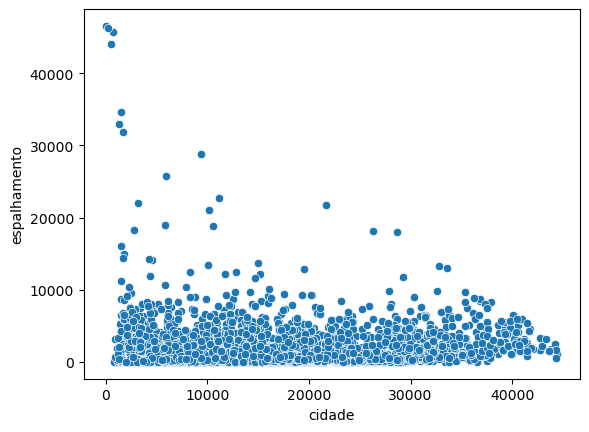

In [40]:
import seaborn as sns
sns.scatterplot(data=df_analise, x="cidade", y="espalhamento")

### Definir agrupamento de espalhamento
Será utilizado kmeans

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

>>> X = np.array([[1, 2], [1, 4], [1, 0],
...               [10, 2], [10, 4], [10, 0]])
>>> kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
>>> kmeans.labels_
array([1, 1, 1, 0, 0, 0], dtype=int32)
>>> kmeans.predict([[0, 0], [12, 3]])
array([1, 0], dtype=int32)
>>> kmeans.cluster_centers_

### Escrever resultado

TODO: Escrever resultado depois de agrupar

In [65]:
#Escrever em csv resultado
# tb_municipio.to_csv("../data/integrado/municipio.csv", index=False)